In [12]:
import stagem1.temporal_integration as sti

In [118]:
x=sti.SetUp()
ae2=sti.np.power(x.out_ds.advancement,2)
x.update_model(intmethod=sti.Runge_Kutta2)
ark22=sti.np.power(x.out_ds.advancement,2)
x.update_model(intmethod=sti.Runge_Kutta4)
ark42=sti.np.power(x.out_ds.advancement,2)
a2 = sti.xr.Dataset({
    "Euler": ae2,
    "RK2": ark22,
    "RK4": ark42}
)
a2

<xarray.Dataset>
Dimensions:  (a: 100, otime: 96)
Coordinates:
  * a        (a) float64 0.0 2.02e+03 4.04e+03 ... 1.96e+05 1.98e+05 2e+05
  * otime    (otime) int64 0 3600 7200 10800 ... 331200 334800 338400 342000
Data variables:
    Euler    (otime, a) float64 0.0 0.0 0.0 ... 1.194e+09 1.195e+09 1.196e+09
    RK2      (otime, a) float64 0.0 0.0 0.0 ... 1.194e+09 1.195e+09 1.196e+09
    RK4      (otime, a) float64 0.0 0.0 0.0 ... 1.194e+09 1.195e+09 1.195e+09

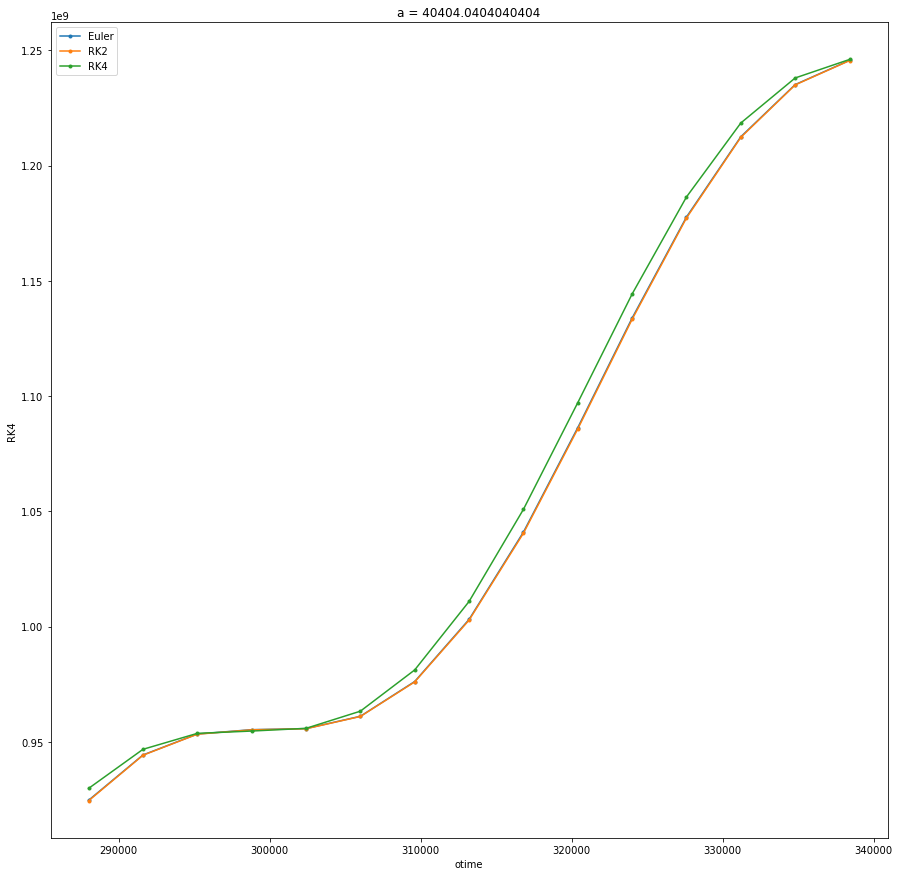

In [117]:

traj=20

#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="Euler", marker='.', figsize=(15,15), s=10, label='Euler', )
#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="RK2", marker='.', s=10, label='RK2')
#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="RK4", marker='.', s=10, label= 'RK4')

a2.isel(a=traj, otime=sti.np.arange(80,95)).Euler.plot( marker='.', figsize=(15,15) ,label='Euler', )
a2.isel(a=traj, otime=sti.np.arange(80,95)).RK2.plot(marker='.',label='RK2')
a2.isel(a=traj, otime=sti.np.arange(80,95)).RK4.plot(marker='.', label= 'RK4')

sti.plt.legend()

In [122]:
x1=sti.SetUp()
x1.update_parameters(velocity__advected=0)
ae2=sti.np.power(x1.out_ds.advancement,2)
x1.update_model(intmethod=sti.Runge_Kutta2)
ark22=sti.np.power(x1.out_ds.advancement,2)
x1.update_model(intmethod=sti.Runge_Kutta4)
ark42=sti.np.power(x1.out_ds.advancement,2)
a2 = sti.xr.Dataset({
    "Euler": ae2,
    "RK2": ark22,
    "RK4": ark42}
)
a2

<xarray.Dataset>
Dimensions:  (a: 100, otime: 96)
Coordinates:
  * a        (a) float64 0.0 2.02e+03 4.04e+03 ... 1.96e+05 1.98e+05 2e+05
  * otime    (otime) int64 0 3600 7200 10800 ... 331200 334800 338400 342000
Data variables:
    Euler    (otime, a) float64 0.0 0.0 0.0 ... 1.189e+09 1.202e+09 1.214e+09
    RK2      (otime, a) float64 0.0 0.0 0.0 0.0 ... 1.19e+09 1.202e+09 1.215e+09
    RK4      (otime, a) float64 0.0 0.0 0.0 0.0 ... 1.178e+09 1.19e+09 1.202e+09

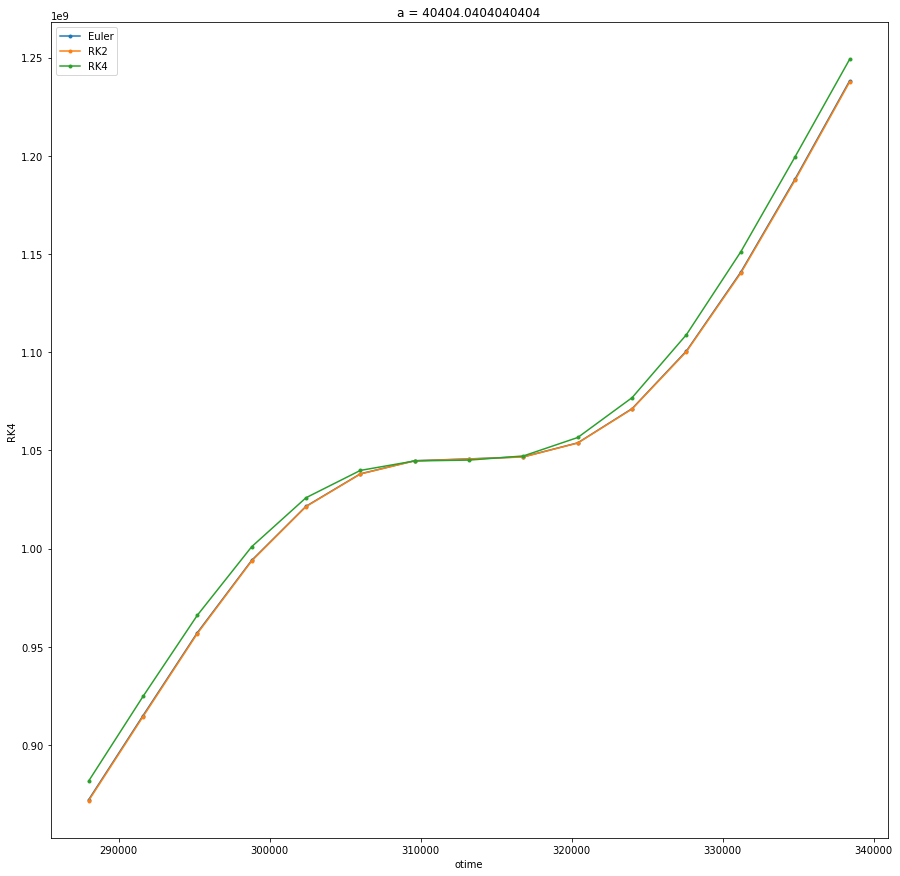

In [123]:

traj=20

#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="Euler", marker='.', figsize=(15,15), s=10, label='Euler', )
#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="RK2", marker='.', s=10, label='RK2')
#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="RK4", marker='.', s=10, label= 'RK4')

a2.isel(a=traj, otime=sti.np.arange(80,95)).Euler.plot( marker='.', figsize=(15,15) ,label='Euler', )
a2.isel(a=traj, otime=sti.np.arange(80,95)).RK2.plot(marker='.',label='RK2')
a2.isel(a=traj, otime=sti.np.arange(80,95)).RK4.plot(marker='.', label= 'RK4')

sti.plt.legend()

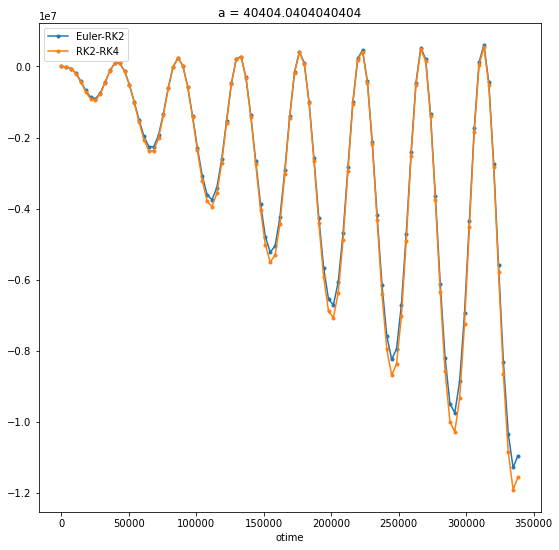

In [128]:

traj=20

#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="Euler", marker='.', figsize=(15,15), s=10, label='Euler', )
#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="RK2", marker='.', s=10, label='RK2')
#a2.isel(a=traj, otime=sti.np.arange(50,95)).plot.scatter(x="otime", y="RK4", marker='.', s=10, label= 'RK4')

(a2.Euler-a2.RK4).isel(a=traj, otime=sti.np.arange(0,95)).plot(marker='.',label='Euler-RK2',figsize=(9,9))
(a2.RK2-a2.RK4).isel(a=traj, otime=sti.np.arange(0,95)).plot(marker='.', label= 'RK2-RK4')

sti.plt.legend()